Audrey Der (861221280)

Due: June 4, 2018

Late Days Used: 1 (5 AM submission cutoff.)

Late Days Remaining: 1

# CS235: Assignment 2

Import the necessary libraries. Findspark and pyspark are needed for [blank]. time and re are for spacing out requests (as per terms of use) for geopy, and for [blank], respectively.

In [1]:
import findspark
findspark.init()
from pyspark import SparkContext
import re
import time

### Question 1:
Before any mapping or reducing can take place, the tsv from Assignment 1 must be parsed. The tsv produced by `text_file = text_file.map(lambda line:split("\t")[2]) \` was in the format of `[Conference Acronym \t Conference Name \t City]`. This was a counting question, so the key was the city and the value its frequency. The output is sorted in ascending order. __The rest of the questions were approached with a similar thought process.__

In [ ]:
# reduce by key (city) and value is word count
# sortBy is in descending order, add the parameter "ascending=False"
try:
    sc = SparkContext("local", "Simple App")
    text_file = sc.textFile("wikicfp_crawl-txt.tsv") # parse
    counts = text_file.map(lambda line: line.split("\t")[2]) \
        .map(lambda city: (city, 1)) \
        .reduceByKey(lambda a, b: a + b) \
        .sortBy(lambda x: x[1]) 
    output = counts.collect()
    places = []
    for (word, count) in output: 
        print("%s: %i" % (city, count))
        places.append(city)
    print("Word Count: " + str(len(places) - 1))
finally:
    sc.stop()

### Question 2:

In [ ]:
try:
    sc = SparkContext("local", "Simple App")
    text_file = sc.textFile("wikicfp_crawl-txt.tsv")
    counts = text_file.map(lambda line: line.split("\t")) \
        .map(lambda city: (city[2], city[0])) \
        .reduceByKey(lambda a, b: a + ", "+ b) \
        .sortBy(lambda x: x[1])
    output = counts.collect()
    places = []
    for (city, conference) in output:
        print("%s: %s" % (city, conference))
        places.append(conference)
    print("Conference: " + str(len(places) - 1))
finally:
    sc.stop()

### Question 3:

In [ ]:
try:
    sc = SparkContext("local", "Simple App")
    text_file = sc.textFile("wikicfp_crawl-txt.tsv")
    counts = text_file.map(lambda line: line.split("\t")) \
        .map(lambda city: (re.sub('\s\d{4}', "", city[0]), city[2])) \
        .groupByKey()
    output = counts.mapValues(list).collect()
    conferences = []
    for (city, conference) in output:
        conference = list(set(conference))
        print("%s: %s" % (city, conference))
        conferences.append(city)
finally:
    sc.stop()

### Question 4:
I first reduced by the year and then by the city to produce a list of tuples of the format `('year', dictionary{city, count})`.

In [2]:
from collections import Counter

output = None
try:
    sc = SparkContext("local", "Simple App")
    text_file = sc.textFile("wikicfp_crawl-txt.tsv")
    counts = text_file.map(lambda line: line.split("\t")) \
        .map(lambda row: (re.compile('\d{4}').search(row[0]).group(0), [row[2]])) \
        .reduceByKey(lambda a, b: a + b) \
        .map(lambda pair: (pair[0], dict(Counter(pair[1])))) \
        .sortBy(lambda x: x[0])
    
    output = counts.collect()
    print(output)
finally:
    sc.stop()

[('2011', {'Enschede, The Netherlands': 1, 'Hong Kong': 1, 'N/A': 1, 'Menlo Park, California, USA': 1, 'Seattle, Washington, USA': 7, 'Aizu-Wakamatsu, Japan': 1, 'Bangalore, Karnataka, India': 1, 'Bonn, Germany': 1, 'Vancouver, Canada': 2, 'Riga, Latvia': 1, 'Lisbon, Portugal': 2, 'Glasgow, Scotland, UK': 4, 'Kaohsiung, Taiwan': 1, 'Hsinchu City, Taiwan': 1, 'Berlin, Germany': 1, 'Beijing, China': 1, 'Milan, Italy': 1, 'Incheon, Korea': 1, 'Saint Petersburg, Russia': 1, 'Clermont-Ferrand, France': 1, 'Paris, France': 1, 'Varazdin, Croatia': 1, 'Dayton, Ohio, USA': 1, 'Toulouse, France': 2, 'Paphos, Cyprus': 1}), ('2012', {'N/A': 1, 'Brussels, Belgium': 1, 'Salt Lake City, Utah, USA': 1, 'Pune, India': 1, 'Paphos, Cyprus': 2, 'Pittsburgh, Pennslyvania, USA': 1, 'Maui, Hawaii, USA': 5, 'Macau, China': 1, 'Rome, Italy': 8, 'Rabat, Morocco': 1, 'Bangkok, Thailand': 1, 'San Jose, California, USA': 1, 'Istanbul, Turkey': 7, 'Gaithersburg, MD USA': 1, 'São Paulo, Brazil': 1, 'Montpellier, Fra

Then I put all the cities (regardless of year) into a dictionary. This will be used to query coordinates for the eventual heatmap plotting.

In [3]:
year_str = []
years = []
for i in output:
    # year list
    year_str.append(str(i[0]))
    current_year = []
    for j in i[1].items():
        current_year.append(j)
    years.append(current_year)
    
for i in years:
    print(i)

[('Enschede, The Netherlands', 1), ('Hong Kong', 1), ('N/A', 1), ('Menlo Park, California, USA', 1), ('Seattle, Washington, USA', 7), ('Aizu-Wakamatsu, Japan', 1), ('Bangalore, Karnataka, India', 1), ('Bonn, Germany', 1), ('Vancouver, Canada', 2), ('Riga, Latvia', 1), ('Lisbon, Portugal', 2), ('Glasgow, Scotland, UK', 4), ('Kaohsiung, Taiwan', 1), ('Hsinchu City, Taiwan', 1), ('Berlin, Germany', 1), ('Beijing, China', 1), ('Milan, Italy', 1), ('Incheon, Korea', 1), ('Saint Petersburg, Russia', 1), ('Clermont-Ferrand, France', 1), ('Paris, France', 1), ('Varazdin, Croatia', 1), ('Dayton, Ohio, USA', 1), ('Toulouse, France', 2), ('Paphos, Cyprus', 1)]
[('N/A', 1), ('Brussels, Belgium', 1), ('Salt Lake City, Utah, USA', 1), ('Pune, India', 1), ('Paphos, Cyprus', 2), ('Pittsburgh, Pennslyvania, USA', 1), ('Maui, Hawaii, USA', 5), ('Macau, China', 1), ('Rome, Italy', 8), ('Rabat, Morocco', 1), ('Bangkok, Thailand', 1), ('San Jose, California, USA', 1), ('Istanbul, Turkey', 7), ('Gaithersbur

The following, to queries for coordinates using geopy.

In [4]:
# locations = {}

In [17]:
from geopy.geocoders import Nominatim
from tqdm import tqdm_notebook
geolocator = Nominatim(user_agent="audie")
# lon, lat, amount
coordinates = []

for conferences in tqdm_notebook(years, leave=False, desc='year'):
    temp_coords = [[], [], []] 
    for c in tqdm_notebook(conferences, leave=False, desc='conference'):
        try:
            location = geolocator.geocode(c[0], timeout=10)
            if location is None:
                continue
            temp_coords[0].append(location.longitude)
            temp_coords[1].append(location.latitude)
            temp_coords[2].append(c[1])
        except:
            exit(1)
    coordinates.append(temp_coords)

In [18]:
# locations # print and verify output

Plot the maps. I used Basemap and Gall Sterographic Projection Maps.

In [40]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

/Users/audrey_der/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/Users/audrey_der/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/audrey_der/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


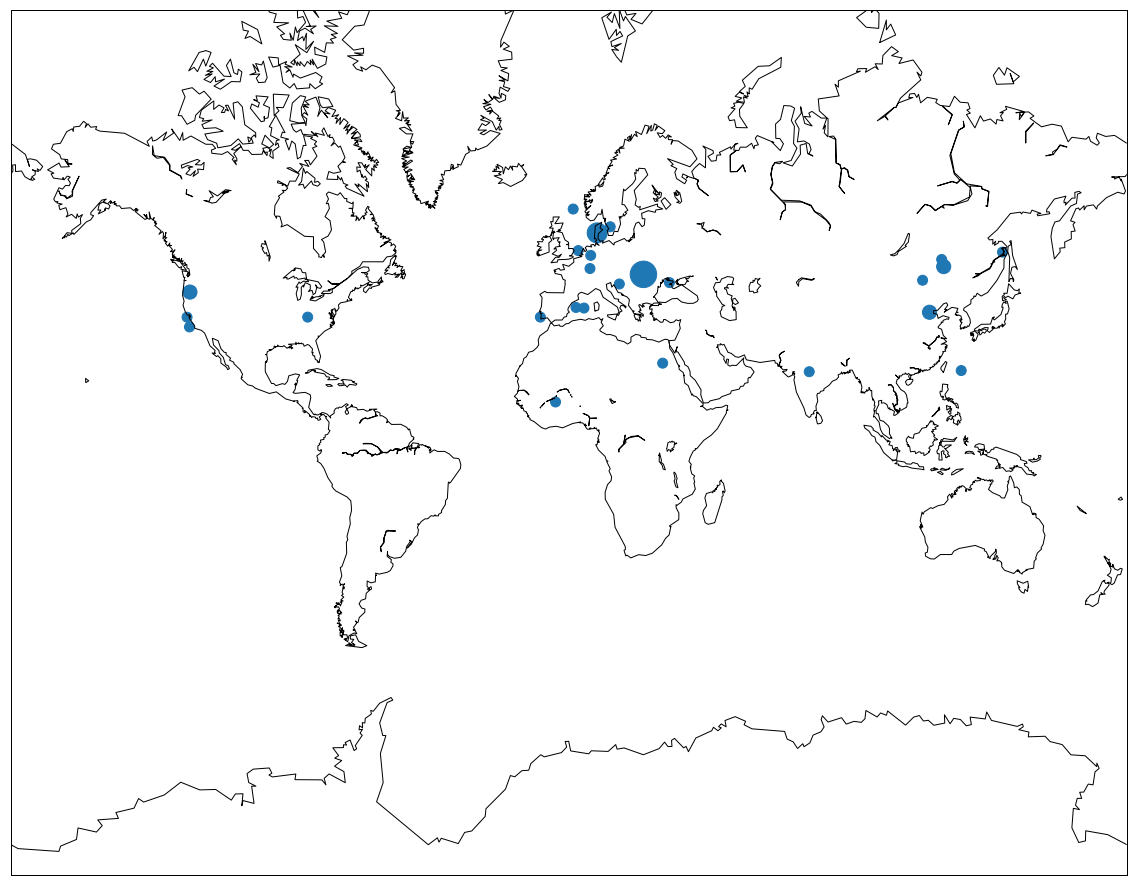

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

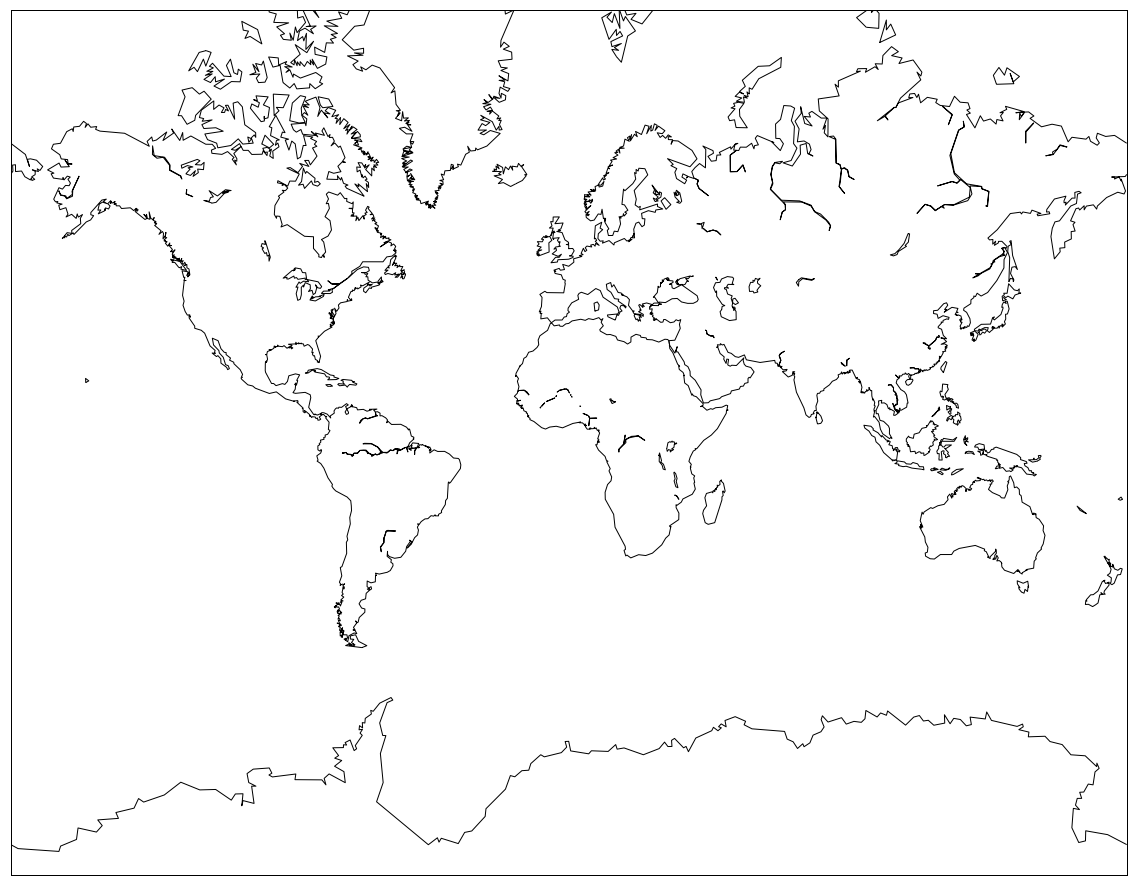

In [47]:
for i in range(len(coordinates)):
#     print(len(coordinates[i][0]) is len(coordinates[i][1]) is len(coordinates[i][2]))
    plt.figure(figsize=(20, 40))
#     m = Basemap(projection='gall',llcrnrlat=-90,urcrnrlat=90,\
#                 llcrnrlon=-180,urcrnrlon=180,resolution='c')
    m = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, \
                llcrnrlon=-180,urcrnrlon=180, lat_ts=20, resolution='c')
    m.drawcoastlines()
#     m.fillcontinents(lake_color='aqua')
#     m.drawparallels(np.arange(-90.,91.,30.))
#     m.drawmeridians(np.arange(-180.,181.,60.))
    m.drawmapboundary(fill_color='white')
#     plt.title("Gall Stereographic Projection: Conference Heatmap for " + str(output[i][0]))
    m.scatter(coordinates[i][0], coordinates[i][1], s=[x * 100 for x in coordinates[i][2]], latlon=True)
#     plt.savefig("Conference Heatmap " + str(output[i][0]) + '.png') #str(output[i][0]) is the year
    plt.show()